<a href="https://colab.research.google.com/github/LiuChen-5749342/LiuChen-Programming-BigDataAnalytics/blob/main/Spotify_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving spotify.csv to spotify.csv


In [3]:
import pandas as pd
import numpy as np

spotify = pd.read_csv('spotify.csv')
spotify.head()

,user_id,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,29,US,Family,250,57,0.36,Mobile,0,1,1


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   offline_listening      8000 non-null   int64  
 10  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 687.6+ KB


In [5]:
country_counts = spotify['country'].value_counts()
subscription_counts = spotify['subscription_type'].value_counts()
device_counts = spotify['device_type'].value_counts()
display(country_counts)
display(subscription_counts)
display(device_counts)

,count
country,
AU,1034
US,1032
DE,1015
IN,1011
PK,999
FR,989
UK,966
CA,954


,count
subscription_type,
Premium,2115
Free,2018
Student,1959
Family,1908


,count
device_type,
Desktop,2778
Web,2623
Mobile,2599


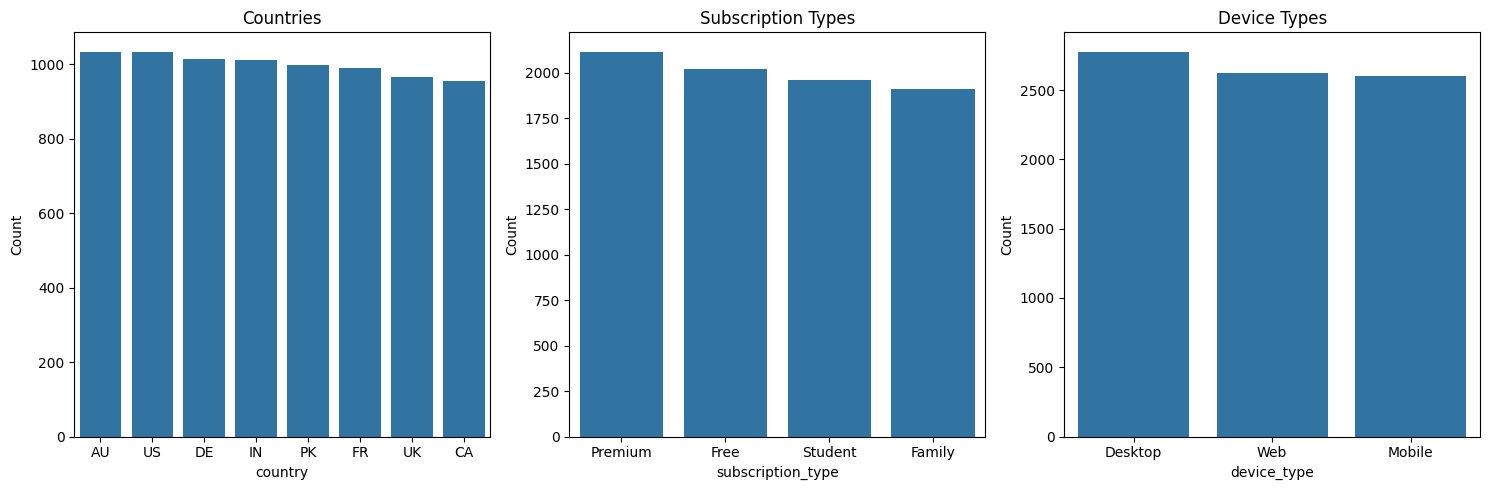

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=country_counts.index, y=country_counts.values, ax=axes[0])
axes[0].set_title('Countries')
axes[0].set_ylabel('Count')

sns.barplot(x=subscription_counts.index, y=subscription_counts.values, ax=axes[1])
axes[1].set_title('Subscription Types')
axes[1].set_ylabel('Count')

sns.barplot(x=device_counts.index, y=device_counts.values, ax=axes[2])
axes[2].set_title('Device Types')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
numerical_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

for col in numerical_cols:
    mean_val = spotify[col].mean()
    median_val = spotify[col].median()
    # Mode can return multiple values, so we take the first one if it exists
    mode_val = spotify[col].mode().iloc[0] if not spotify[col].mode().empty else 'No unique mode'

    print(f"Column: {col}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print("-" * 20)

Column: age
  Mean: 37.66
  Median: 38.00
  Mode: 51
--------------------
Column: listening_time
  Mean: 154.07
  Median: 154.00
  Mode: 99
--------------------
Column: songs_played_per_day
  Mean: 50.13
  Median: 50.00
  Mode: 39
--------------------
Column: skip_rate
  Mean: 0.30
  Median: 0.30
  Mode: 0.34
--------------------
Column: ads_listened_per_week
  Mean: 6.94
  Median: 0.00
  Mode: 0
--------------------
